In [1]:
%matplotlib inline
import numpy as np                                    #arrays and matrix math
import pandas as pd                                   #work with DataFrames
import matplotlib.pyplot as plt                       #plotting and visualization
import matplotlib.dates as mdates                     #datetime formate in plots

import h5py                                           #import h5 files
import os                                             #OS operations
import scipy.signal as signal                         #signal processing
from scipy.io import loadmat                          #load MatLab m-files

from sklearn.decomposition import PCA

from skimage.metrics import mean_squared_error as image_mse         #Mean Squared Error
from skimage.metrics import structural_similarity as image_ssim     #Structural Similarity Index
from skimage.metrics import peak_signal_noise_ratio as image_psnr   #Peak Signal-Noise Ratio

# Define arguments for text box in PLT.TEXT()
my_box = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Check tensorflow GPU settings
import tensorflow as tf
sys_info = tf.sysconfig.get_build_info()
print('Tensorflow built with CUDA?',  tf.test.is_built_with_cuda())
print('Devices available:', tf.config.experimental.list_physical_devices())
print('# GPU available:', len(tf.config.experimental.list_physical_devices('GPU')))
print("CUDA: {} | cuDNN: {}".format(sys_info["cuda_version"], sys_info["cudnn_version"]))
tf.config.list_physical_devices()

Tensorflow built with CUDA? True
Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]
# GPU available: 1
CUDA: 64_101 | cuDNN: 64_7


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

***

In [2]:
# EXPERIMENT 54 ONLY
data_exp54 = pd.read_pickle('data_exp54.pkl')
print('Experiment 54 shape: {}'.format(data_exp54.shape))

time_complete_exp54 = np.array([loadmat('time_complete_54.mat')['time']], dtype='datetime64[us]').reshape(-1)
print('Times for Experiment 54 shape: {}'.format(time_complete_exp54.shape))

trange_54 = mdates.date2num(time_complete_exp54)
xrange_54 = np.arange(4950, 5150)
print('Timerange 54: {}'.format(trange_54.shape))
print('X-range 54: {}'.format(xrange_54.shape))

Experiment 54 shape: (200, 4200000)
Times for Experiment 54 shape: (4200000,)
Timerange 54: (4200000,)
X-range 54: (200,)


In [ ]:
# fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
# date_format = mdates.DateFormatter('%H:%M:%S')

# im1 = ax1.imshow(data_exp54, aspect='auto', cmap='seismic', vmin=-50, vmax=50, extent=[trange_54[0], trange_54[-1], xrange_54[-1], xrange_54[0]])
# ax1.xaxis_date(); ax1.xaxis.set_major_formatter(date_format)
# ax1.set_xlabel('Time [s] on 06/20/2019'); ax1.set_ylabel('Distance [m]'); ax1.set_title('Experiment 54')
# plt.colorbar(im1, ax=ax1)

# fig.autofmt_xdate()
# plt.show();

***

PCA (Principal Component Analysis)

In [7]:
##### Compression Ratio shapes #####
###   10%  compression = 20 PC   ###
###   5%   compression = 10 PC   ###
###   0.5% compression = 1  PC   ###
####################################

In [20]:
# Define how many principal components we want to keep
k = 1
pca = PCA(n_components = k)
pca.fit(data_exp54.T)

# Store principal components in a DataFrame
z_pca = pca.transform(data_exp54.T)
z_pca = pd.DataFrame(pca.transform(data_exp54.T), columns=['PCA%i' % i for i in range(k)])

# Compute the inverse transform onto the original dimension
data_ipca = pca.inverse_transform(z_pca).T

data_exp = np.array(data_exp54)
data_exp_norm  = data_exp  / np.max(np.abs(data_exp))  #normalize original data
data_ipca_norm = data_ipca / np.max(np.abs(data_ipca)) #normalize reconstructed data 

mse  = image_mse(data_exp_norm, data_ipca_norm)
ssim = image_ssim(data_exp_norm, data_ipca_norm)
psnr = image_psnr(data_exp_norm, data_ipca_norm)

print('MSE={:.2e} | SSIM={:.2f} | PSNR={:.2f}'.format(mse, ssim*100, psnr))

MSE=1.40e-03 | SSIM=79.54 | PSNR=34.54


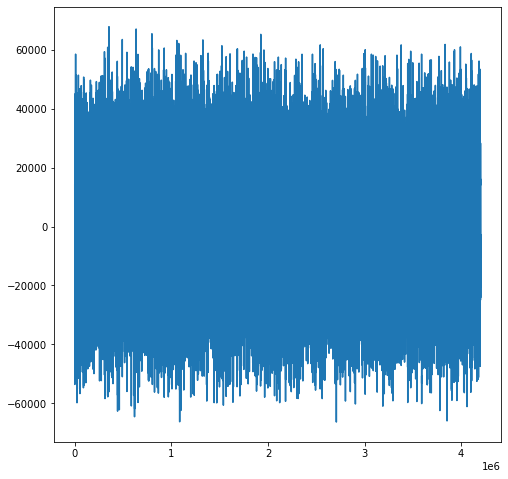

In [25]:
plt.figure(figsize=(8,8), facecolor='white')
plt.plot(np.array(z_pca).reshape(-1))
plt.show();

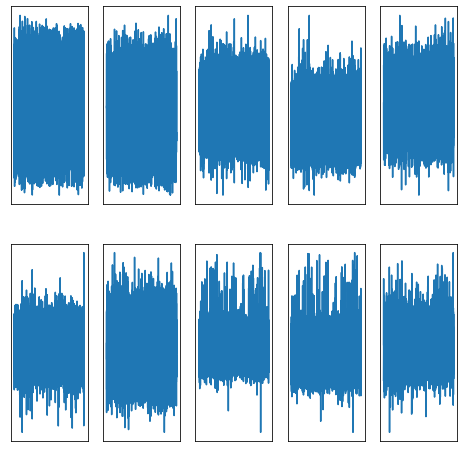

In [17]:
plt.figure(figsize=(8,8), facecolor='white')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(np.array((z_pca))[:,i])
    plt.xticks([]); plt.yticks([])
plt.show();

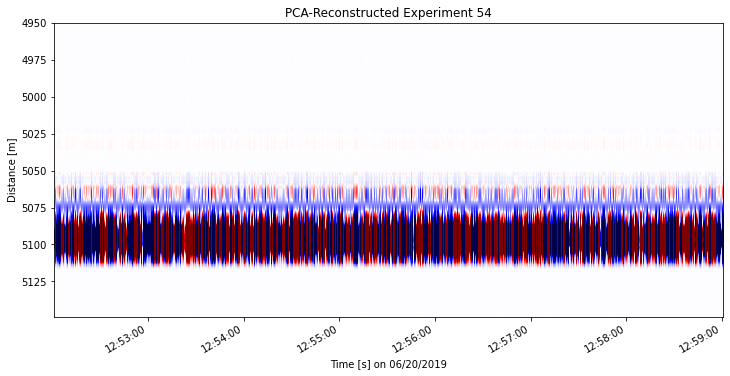

In [21]:
fig, ax1  = plt.subplots(1, 1, figsize=(12,6))
date_format = mdates.DateFormatter('%H:%M:%S')
im1 = ax1.imshow(data_ipca, aspect='auto', cmap='seismic', vmin=-50, vmax=50, extent=[trange_54[0], trange_54[-1], xrange_54[-1], xrange_54[0]])
ax1.xaxis_date(); ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel('Time [s] on 06/20/2019'); ax1.set_ylabel('Distance [m]') 
ax1.set_title('PCA-Reconstructed Experiment 54')
fig.autofmt_xdate()
plt.show();

***

# END